# PART 1

# The import Statement

Python is made up of several modules

Before you can use a module, you must import it
  

In [1]:
# First, we'll import pandas, a data processing library

import pandas as pd

from pandas import Series, DataFrame

import seaborn as sns # Python graphing library

import numpy as np #Adds Python support for large, multi-dimensional arrays and matrices

import matplotlib.pyplot as plt # Python graphing library

from mpl_toolkits.mplot3d import Axes3D # Python graphing library

# Series
A Series is a one-dimensional array-like object containing an array of data and an associated array of data labels. The data can be any NumPy data type and the labels are the Series' index.

Create a Series:

In [2]:
ser_1 = Series([1, 1, 2, -3, -5, 8, 13])
ser_1




0     1
1     1
2     2
3    -3
4    -5
5     8
6    13
dtype: int64

Get the array representation of a Series:

In [3]:
ser_1.values

array([ 1,  1,  2, -3, -5,  8, 13])

Create a Series with a custom index:

In [4]:
ser_2 = Series([1, 1, 2, -3, -5], index=['a', 'b', 'c', 'd', 'e'])
ser_2

a    1
b    1
c    2
d   -3
e   -5
dtype: int64

Get a set of values from a Series by passing in a list:

In [5]:
ser_2[['c', 'a', 'b']]

c    2
a    1
b    1
dtype: int64

# [Creating Data Frames](http://pandas.pydata.org/pandas-docs/stable/dsintro.html )

Data frames are the central concept in pandas.A DataFrame is a tabular data structure containing an ordered collection of columns. Each column can have a different type. DataFrames have both row and column indices and is analogous to a dict of Series. Row and column operations are treated roughly symmetrically. Columns returned when indexing a DataFrame are views of the underlying data, not a copy.

In essence, a data frame is table with labeled rows and columns.

Create a DataFrame:

In [6]:
data_1 = {'state' : ['VA', 'VA', 'VA', 'MD', 'MD'],
          'year' : [2012, 2013, 2014, 2014, 2015],
          'pop' : [5.0, 5.1, 5.2, 4.0, 4.1]}
df_1 = DataFrame(data_1)
df_1

,pop,state,year
0,5.0,VA,2012
1,5.1,VA,2013
2,5.2,VA,2014
3,4.0,MD,2014
4,4.1,MD,2015


Data frames can be created from multiple sources - e.g. CSV files, excel files, and JSON.

[we use read_csv method to read a csv file](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

Loading a CSV file as a data frame is pretty easy:

*data_frame = pandas.read_csv('file.csv', sep=';')*

Sometimes the CSV file contains padding spaces in front of the values. To ignore them use the skipinitialspaces parameter:

*pandas.read_csv('file.csv', sep=';', skipinitialspace=True)*

If the padding white spaces occur on both sides of the cell values we need to use a regular expression separator. In this case, we need to use the ‘python’ processing engine, instead of the underlying native one, in order to avoid warnings. This will degrade the performance a bit:

*pandas.read_csv('file.csv', sep='\s*;\s*', skipinitialspace=True, engine='python')*

Sometimes we need to sample the data before loading it, as it is too big to fit in memory. This can be achieved following this approach.

In [7]:
#  we'll load the Iris flower dataset using read_csv, which is in the  directory were we intialised our jupyter kernel



df = pd.read_csv('data/bezdekIris.data',names=['sepallength','sepalwidth','petallength','petalwidth','flower'])
data=df #assign dataframe  another name

#now data is pandas dataframe which contains iris data  


#data.info - gives info about dataframe



# Previewing Data

To preview the data and the metadata of a dataframe you can use the following functions:

Displays the top 5 rows. Accepts an optional int parameter - num. of rows to show

*df.head()*

Similar to head, but displays the last rows

*df.tail()*

The dimensions of the dataframe as a (rows, cols) tuple

*df.shape*

The number of columns. Equal to df.shape[0]

*len(df)* 

An array of the column names

*df.columns* 

Columns and their types

*df.dtypes*

Converts the frame to a two-dimensional table

*df.values* 

Displays descriptive stats for all columns

*df.describe()*

In [8]:
#data.info - gives info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
flower         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html)

1.loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:

    A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index. This use is not an integer position along the index)

    A list or array of labels ['a', 'b', 'c']

    A slice object with labels 'a':'f', (note that contrary to usual python slices, both the start and the stop are included!)

    A boolean array

    A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for 
indexing (one of the above)

2 .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with python/numpy slice semantics). Allowed inputs are:

    An integer e.g. 5

    A list or array of integers [4, 3, 0]

    A slice object with ints 1:7

    A boolean array

    A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above)
    
### Individual columns can be selected with the [] operator or directly as attributes:

Selects only the column named 'sepallength'

*data.sepallength or 
data['sepallength']*

Select two columns:

*data['sepalength','petallength']*

Selects First 4 rows and first 2 columns

*data.iloc[0:4, 0:2]*

[pandas intro](http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/#selecting_querying)

[pandas cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-selection)



In [9]:
data.loc[0:4] #prints first 4 rows

data.loc[1]['sepalwidth']

3.0

In [10]:
print data['sepallength'] #selects coloum sepallength 

print data['sepallength'].loc[1:4] #selects first 4 rows of coloum sepallenght

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
5      5.4
6      4.6
7      5.0
8      4.4
9      4.9
10     5.4
11     4.8
12     4.8
13     4.3
14     5.8
15     5.7
16     5.4
17     5.1
18     5.7
19     5.1
20     5.4
21     5.1
22     4.6
23     5.1
24     4.8
25     5.0
26     5.0
27     5.2
28     5.2
29     4.7
      ... 
120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepallength, dtype: float64
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepallength, dtype: float64


**It is often useful to create new columns based on existing ones by using a function. The new columns are often 
calledDerived Characteristics:**

1._data['sepalsize']=data.sepallength * data.sepalwidth_  

2.you can use **numpy** underlying function:                  
  *data['sepalsize']=np.multiply(data['sepalwidth'],data['sepallength'])*           

3.you can use **funtions**          
    _def fab(row):     
        return row['sepallength'] * row['sepalwidth']_                                  
   
   data['sepalsize'] = data.apply(fab, axis=1)*  
4.**[lamda method](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html)** 

In [11]:
#create a new coloum petalsize which is the product of petalwidth and petallength
data['sepalsize']=data.apply(lambda ssize: ssize['sepalwidth']*ssize['sepallength'],axis=1)

data['petalsize']=data.apply(lambda psize: psize['petalwidth']*psize['petallength'],axis=1)

data

,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,21.06,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,15.64,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,17.00,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,12.76,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,15.19,0.15


In [12]:
#drop all rows which have inalid data eg NaN
data=data.dropna()
data

,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,21.06,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,15.64,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,17.00,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,12.76,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,15.19,0.15


# [Grouping of data](http://pandas.pydata.org/pandas-docs/stable/groupby.html#splitting-an-object-into-groups)      
By **group by** we are referring to a process involving one or more of the following steps  

    1.Splitting the data into groups based on some criteria  
    2.Applying a function to each group independently  
    3.Combining the results into a data structure  
Of these, the split step is the most straightforward. In fact, in many situations you may wish to split the data set into groups and do something with those groups yourself. In the apply step, we might wish to one of the following:  

    Aggregation: computing a summary statistic (or statistics) about each group. Some examples:

        Compute group sums or means
        Compute group sizes / counts
    Transformation: perform some group-specific computations and return a like-indexed. Some examples:

        Standardizing data (zscore) within group
        Filling NAs within groups with a value derived from each group
    Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

        Discarding data that belongs to groups with only a few members
        Filtering out data based on the group sum or mean
Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories

In [13]:
grouped=data.groupby('flower')# data grouping  according to the flower ctgry
print grouped.size() #prints each group size

flower
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [14]:
print "\nSetosa data\n",grouped.get_group('Iris-setosa')# data for flower iris-sentosa



Setosa data
    sepallength  sepalwidth  petallength  petalwidth       flower  sepalsize  \
0           5.1         3.5          1.4         0.2  Iris-setosa      17.85   
1           4.9         3.0          1.4         0.2  Iris-setosa      14.70   
2           4.7         3.2          1.3         0.2  Iris-setosa      15.04   
3           4.6         3.1          1.5         0.2  Iris-setosa      14.26   
4           5.0         3.6          1.4         0.2  Iris-setosa      18.00   
5           5.4         3.9          1.7         0.4  Iris-setosa      21.06   
6           4.6         3.4          1.4         0.3  Iris-setosa      15.64   
7           5.0         3.4          1.5         0.2  Iris-setosa      17.00   
8           4.4         2.9          1.4         0.2  Iris-setosa      12.76   
9           4.9         3.1          1.5         0.1  Iris-setosa      15.19   
10          5.4         3.7          1.5         0.2  Iris-setosa      19.98   
11          4.8         3.4

In [15]:
#calculates mean and standard deviation for each coloum specified
grouped_stat=grouped['sepallength','sepalwidth','petallength','petalwidth','flower','petalsize','sepalsize']\
.agg([np.mean, np.std])

grouped_stat


sepallength           sepalwidth           petallength  \
                       mean       std       mean       std        mean   
flower                                                                   
Iris-setosa           5.006  0.352490      3.428  0.379064       1.462   
Iris-versicolor       5.936  0.516171      2.770  0.313798       4.260   
Iris-virginica        6.588  0.635880      2.974  0.322497       5.552   

                          petalwidth           petalsize           sepalsize  \
                      std       mean       std      mean       std      mean   
flower                                                                         
Iris-setosa      0.173664      0.246  0.105386    0.3656  0.181155   17.2578   
Iris-versicolor  0.469911      1.326  0.197753    5.7204  1.368403   16.5262   
Iris-virginica   0.551895      2.026  0.274650   11.2962  2.157412   19.6846   

                           
                      std  
flower                     
Iris-setosa      2.933775  
Iris-versicolor  2.866882  
Iris-virginica   3.458783

In [16]:
# mean value of Iris-setosa's sepallength
print grouped_stat['sepallength']['mean']['Iris-versicolor']

5.936


# Conditional operations 

when we apply column operation eg *df['sepallength']>5*.It returns a boolean Series objects as shown below


0    False
1     True
2     True
3     True
4    False
5    False
6     True
7     True
8     True
9     True  
And then we can use these to index into the object eg *df[df['sepallenght'>5]]* ,which lists all rows satisfying the condition  


To select rows whose column value equals a scalar, some_value, use ==:  

*df.loc[df['column_name'] == some_value]*  

To select rows whose column value is in an iterable, some_values, use isin:

*df.loc[df['column_name'].isin(some_values)]*  

To select rows whose column value does not equal some_value, use !=:  

*df.loc[df['column_name'] != some_value]*  

isin returns a boolean Series, so to select rows whose value is not in some_values, negate the boolean Series using ~:  

*df.loc[~df['column_name'].isin(some_values)]*

In [17]:

#select versicolor flower  where sepallenth greater than its mean
data_filter=data[(data.sepallength >grouped_stat['sepallength']['mean']['Iris-versicolor'] )\
                 & (data.flower =='Iris-versicolor')]
data

,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28
5,5.4,3.9,1.7,0.4,Iris-setosa,21.06,0.68
6,4.6,3.4,1.4,0.3,Iris-setosa,15.64,0.42
7,5.0,3.4,1.5,0.2,Iris-setosa,17.00,0.30
8,4.4,2.9,1.4,0.2,Iris-setosa,12.76,0.28
9,4.9,3.1,1.5,0.1,Iris-setosa,15.19,0.15


# PART 2

## What is Machine Learning? [link](http://machinelearningmastery.com/machine-learning-mastery-method/)

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

We'll take a look at two very simple machine learning tasks here.
The first is a **classification** task: the figure shows a
collection of two-dimensional data, colored according to two different class
labels. A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

![](images/linesep.png)

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

![](images/linearreg.png)

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.

## Representation of Data in ML

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples from the previous section and show some
examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.`

![](images/data-layout.png)

Our iris data can be transformed as

In [18]:
X=data[['sepallength','sepalwidth','petallength','petalwidth']]
y=data[['flower']]
n_samples, n_features = X.shape
print((n_samples, n_features))

(150, 4)


### Before using a Machine Learning algorithm, we will derive a decision logic to classsify the flowers by  analysis of plots. 

*Tables are rarely useful unless we know that our data should fall in a particular range. It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers*  

**Some libraries used are**  
## [seaborn](http://seaborn.pydata.org/tutorial/axis_grids.html)  
## [matplotlib doc](http://matplotlib.org/users/beginner.html),[matplotlib tutorial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/)  
## [mayavi](http://docs.enthought.com/mayavi/mayavi/)


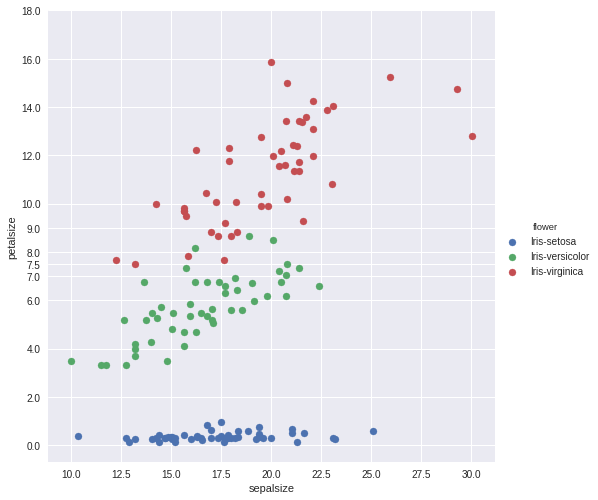

In [19]:
%matplotlib inline 
#this is to display the plot in ipython notebook itself

#plot petalsize against sepalsize and give diff colour based on flower 
sns.FacetGrid(data, hue="flower", size=7) \
   .map(plt.scatter, "sepalsize", "petalsize") \
   .add_legend().set(yticks=[0,2,4,6,7,7.5,8,9,10,12,14,16,18])
sns.plt.show()


By analysing the plot,     
_iris setosa_ can be classiffied or identified by its petalsize alone (petal size less than 2).  
_iris versicolor_ if 2<petalsize<7    
_iris virginica_ if petalsize is greater than 9    
For datapoints where 7<petalsize<9 , we should come up with new decision logic

In [20]:

#find data points  where the petal size is greater than or equalto 7
#find data points  where petal size is less than or equal to 9

criti3=(data.petalsize >=7)
criti4=(data.petalsize <=9) 
# or criti3=(data.petalsize >=7  & data.petalsize<=9)

All = (criti3 & criti4)
data[All]



,sepallength,sepalwidth,petallength,petalwidth,flower,sepalsize,petalsize
52,6.9,3.1,4.9,1.5,Iris-versicolor,21.39,7.35
56,6.3,3.3,4.7,1.6,Iris-versicolor,20.79,7.52
70,5.9,3.2,4.8,1.8,Iris-versicolor,18.88,8.64
72,6.3,2.5,4.9,1.5,Iris-versicolor,15.75,7.35
77,6.7,3.0,5.0,1.7,Iris-versicolor,20.10,8.50
83,6.0,2.7,5.1,1.6,Iris-versicolor,16.20,8.16
85,6.0,3.4,4.5,1.6,Iris-versicolor,20.40,7.20
86,6.7,3.1,4.7,1.5,Iris-versicolor,20.77,7.05
106,4.9,2.5,4.5,1.7,Iris-virginica,12.25,7.65
119,6.0,2.2,5.0,1.5,Iris-virginica,13.20,7.50


Analysing the scatterplot for this new data will help to find a new decision feature

**Scatterplot** matrices plot the distribution of each column along the diagonal, and then plot a scatterplot matrix for the combination of each variable. They make for an efficient tool to look for errors in our data.

### Plot shows the bivariate relation of columns in the new filterd data
### Bar plot :separated green and blue bars shows the features ability to differentiate flower classes

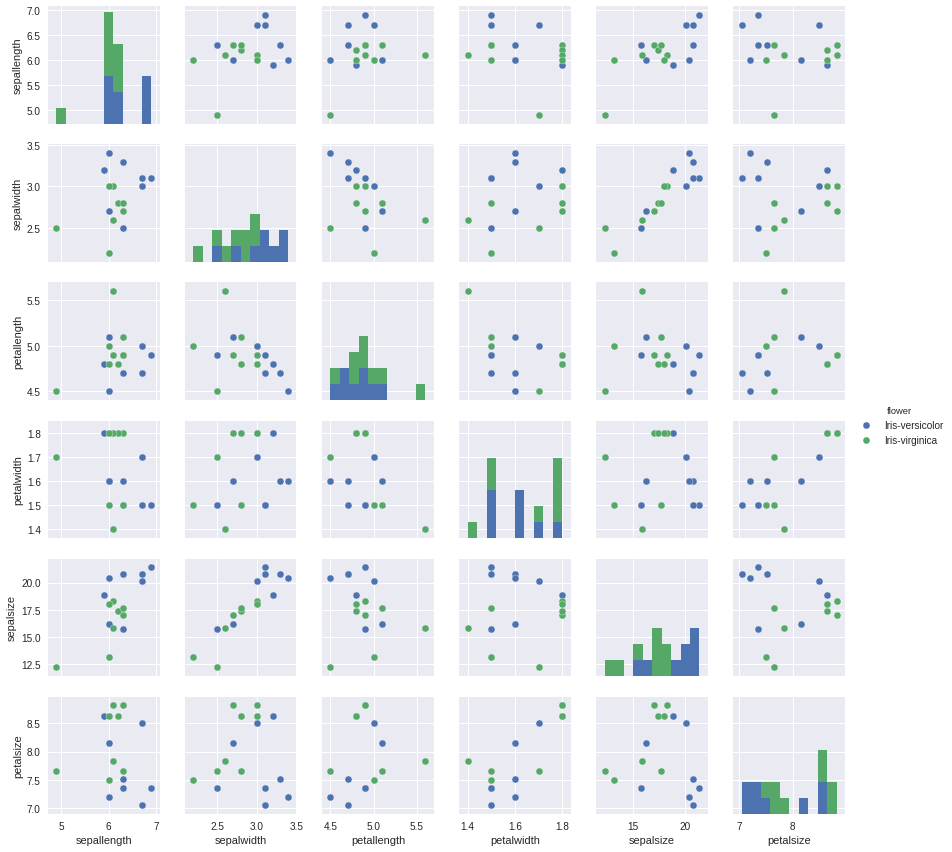

In [21]:
sns.pairplot(data[All], hue="flower", size=2)

Sepalsize feature have more adjacent separated blue and green bars .so we select sepalsize as next decision point 

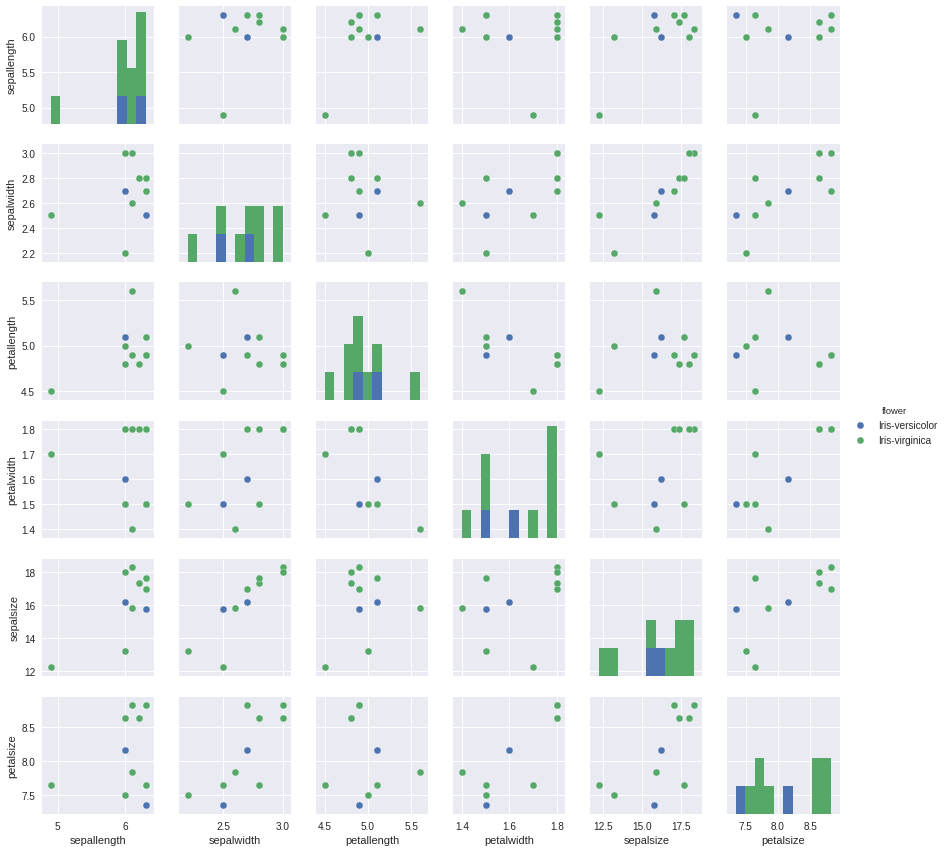

In [22]:
data1=data[All & (data.sepalsize<18.5)]
sns.pairplot(data[All & (data.sepalsize<18.5)], hue="flower", size=2)

Testing our decision tree logic with iris data   
We have 150 data points,each time our decision logic predicts the class of flower accurately  we increment the count value   
Our decision tree can be implemented with basic if else logic as follows

In [23]:
count=0
for i in range(0,150):
    if data.loc[i]['petalsize']<2:
        #iris-setosa
        if data.loc[i]['flower'] =="Iris-setosa":
            count=count+1
    elif data.loc[i]['petalsize']>=9:
        #Iris-virginica
        if data.loc[i]['flower'] =="Iris-virginica":
            count=count+1
        #Iris-versicolor
    elif data.loc[i]['petalsize']<=7:
        if data.loc[i]['flower'] =="Iris-versicolor":
            count=count+1
        #Iris-versicolor
    elif data.loc[i]['sepalsize']>=18.5:
        if data.loc[i]['flower'] =="Iris-versicolor":
            count=count+1
        #Iris-virginica
    else :
        if data.loc[i]['flower'] =="Iris-virginica":
            count=count+1
print count    

148


Above decision logic will fail on new data as it lacks adaptability to new data sets

# Basic Principles of Machine Learning

Here we'll dive into the basic principles of machine learning, and how to
utilize them via the [Scikit-Learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) API.

In [24]:
import pydotplus
from IPython.display import Image 

## The Scikit-learn Estimator Object

Every ML algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a Decision Tree is implemented as so:

In [25]:
from sklearn import tree

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

*DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, presort=False)*

In [26]:
clf = tree.DecisionTreeClassifier()

**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [27]:
clf = clf.fit(X,y)
print clf.feature_importances_

[ 0.02666667  0.          0.05072262  0.92261071]


**Tree can be visualised using grapviz**

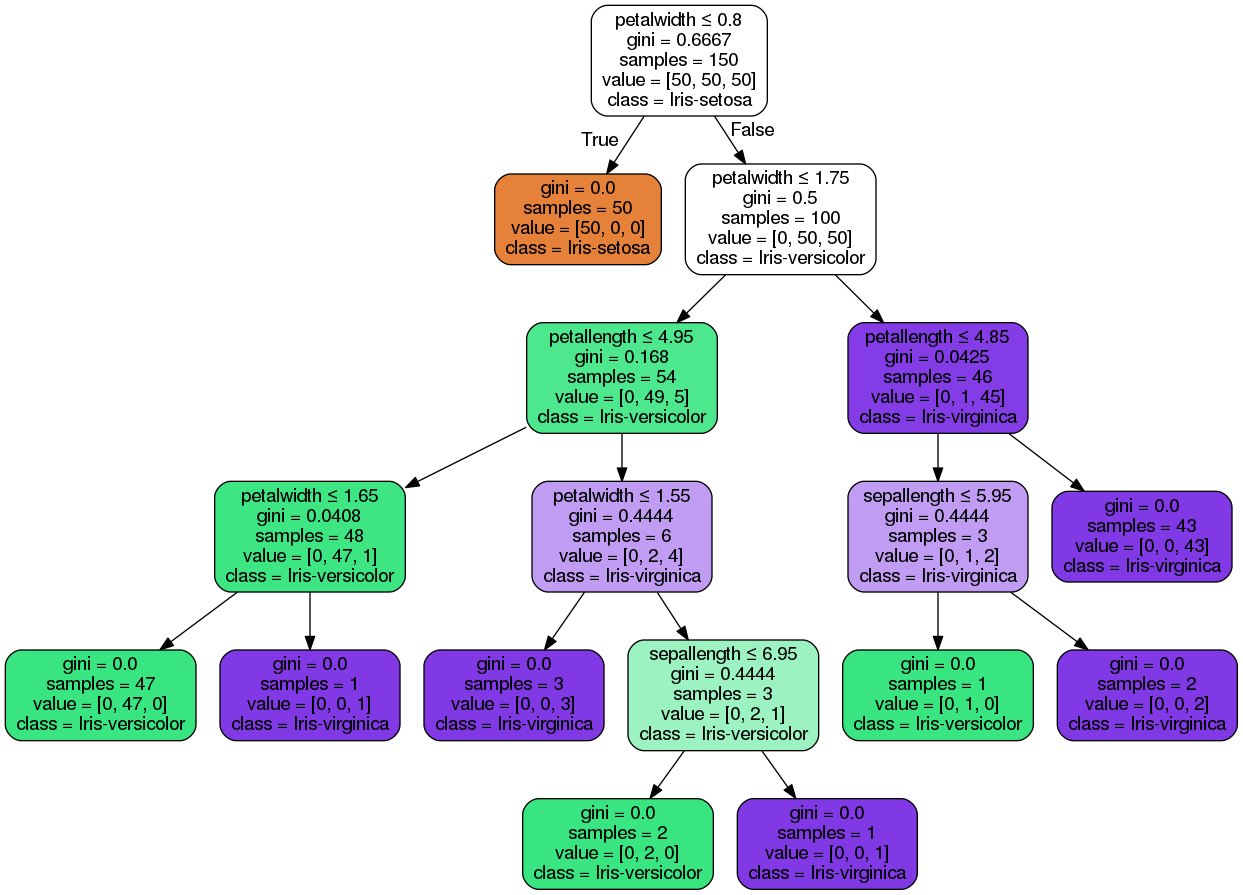

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=y.flower.unique(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 
#graph

After being fitted, the model can then be used to predict the class of samples: the data to be classified should have the same number of features 

New data:['sepallength', 'sepalwidth',    'petallength',     petalwidth']                                                                                                

            4.6       3.4       1.4        .3

In [29]:
print clf.predict([[4.6 ,3.4 ,1.4,0.3]])

['Iris-setosa']


The predicted class is Iris-setosa

## Ploting Decision  Boundary of classifier

2-d plots are easy to visualize, so we limit our feature points to *sepalsize and petalsize* as we did earlier

In [30]:
X=data[['sepalsize','petalsize']]

Fit Decision tree classifier with new features

In [31]:
clf = clf.fit(X,y)
print clf.feature_importances_

[ 0.04419048  0.95580952]


For ploting data, we need to convert the target vector into float values. [labelencoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) converts strings to int label

In [32]:
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y.flower)
print le.classes_,"---->",le.transform(['Iris-setosa','Iris-versicolor','Iris-virginica'])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] ----> [0 1 2]


Now we will create a rectangular grid out of an array of x values and an array of y values.( *x->sepalsixe ,y->petalsixe* ) using [meshgrid](https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python)

In [33]:
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),np.arange(y_min, y_max, .01))

predict the class for each (x,y) pair in the grid

In [34]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Reshape it to the dimesions of grid.That is each (x,y) pair have a z value which is its class

In [35]:
Z = le.transform(Z)
Z = Z.reshape(xx.shape)

Assign color to (x,y) points in grid according to the class,

*pcolormesh(xx, yy,Z, cmap=cmap_light)*

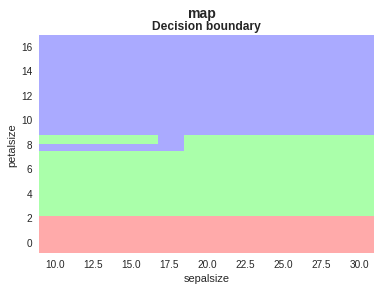

In [36]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
fig = plt.figure()
fig.suptitle('map', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
#fig.subplots_adjust(top=.9)
ax.set_title('Decision boundary',fontweight='bold')
ax.set_xlabel('sepalsize')
ax.set_ylabel('petalsize')
ax.pcolormesh(xx, yy,Z, cmap=cmap_light)

plot the real Data points over the decision boundary.

*scatter(X.iloc[:, 0], X.iloc[:, 1], c=le.transform(y.flower), cmap=cmap_bold)*

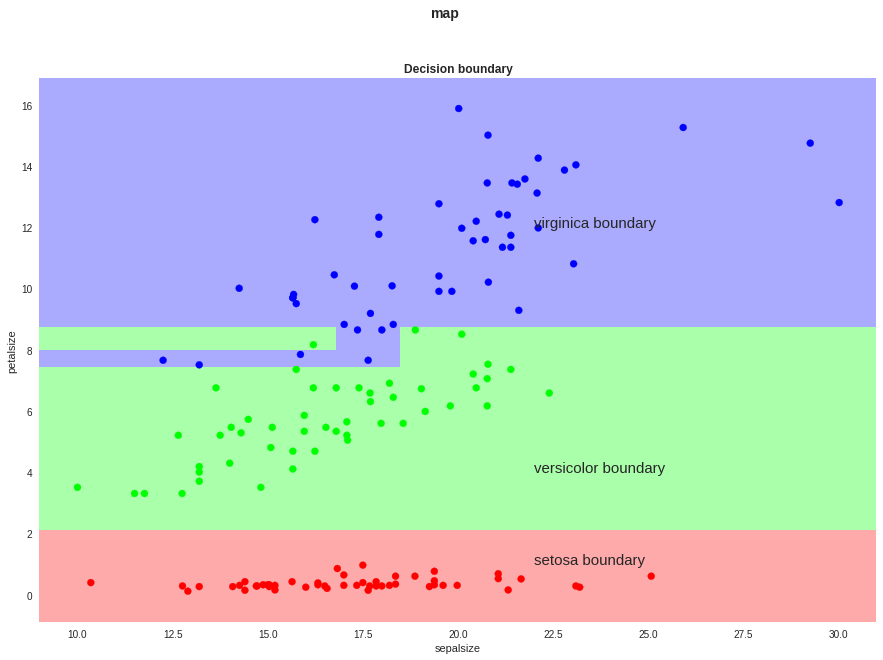

In [37]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('map', fontsize=14, fontweight='bold')
#fig.subplots_adjust(top=.9)
ax.set_title('Decision boundary',fontweight='bold')
ax.set_xlabel('sepalsize')
ax.set_ylabel('petalsize')
ax.pcolormesh(xx, yy,Z, cmap=cmap_light)
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=le.transform(y.flower), cmap=cmap_bold)


ax.text(22,1, 'setosa boundary', fontsize=15)
ax.text(22,4, 'versicolor boundary', fontsize=15)
ax.text(22,12, 'virginica boundary', fontsize=15)
plt.show()

# k-Nearest Neighbors

k-Nearest Neighbors is a classifier like Decision tree 

In k-NN when we want to classify a point we look at its K-closest (most similar) neighbors and we classify the point as the majority class in those neighbors.

KNN depends on two things: A metric used to compute the distance between two points and the value of "k" the number of neighbors to consider. 

The similarity measure or distance is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.

the k-NN algorithm can be summarized as following steps:

        Choose the number of k

        A distance metric.
    
![](images/Euclidean-vs-Manhattan.png)

        Find the knearest neighbors of the sample that we want to classify.

        Assign the class label by majority vote.
![](images/k-NN-wiki.png)

In [38]:
from sklearn import neighbors

/home/space/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


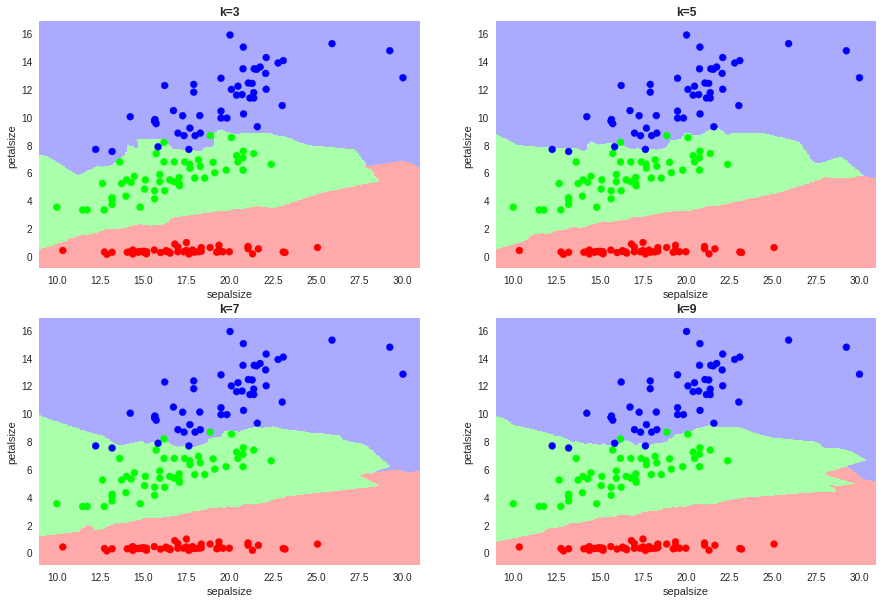

In [39]:
fig, axs = plt.subplots(2,2,figsize=(15, 10))
axs = axs.ravel()
i=0
for k in [3,5,7,9]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = le.transform(Z)
    Z = Z.reshape(xx.shape)
    axs[i].set_title("k="+str(k),fontweight='bold')
    axs[i].set_xlabel('sepalsize')
    axs[i].set_ylabel('petalsize')
    axs[i].pcolormesh(xx, yy,Z, cmap=cmap_light)
    axs[i].scatter(X.iloc[:, 0], X.iloc[:, 1], c=le.transform(y.flower), cmap=cmap_bold)
    i=i+1
    
    
    

Decision boundary of knn and decison tree are different. Decision boudary becomes complex as dataset becomes complex that is when they are not linearly separable.


### ML algorithms use different learning methods so their decision boundary will also be different